In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emoji as emoji
from keras.utils import to_categorical
from keras.models import Sequential,load_model
from keras.layers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping
import cv2

Using TensorFlow backend.


In [2]:
df=pd.read_csv("fer2013.csv")

In [3]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
df.shape

(35887, 3)

In [5]:
df.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

In [6]:
df['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

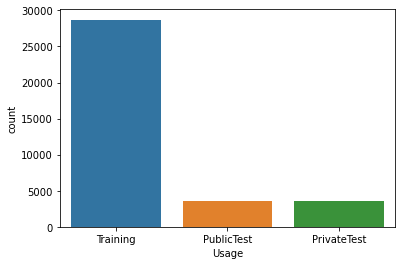

In [7]:
sns.countplot(x="Usage",data=df)

In [8]:
Train=df[df['Usage']=='Training']

In [9]:
Test=df[df['Usage']=='PublicTest']

In [10]:
Train.shape

(28709, 3)

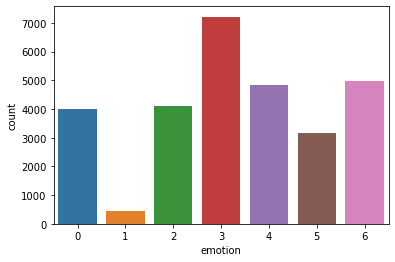

In [20]:
sns.countplot(x="emotion", data=Train)

In [12]:
x_train=Train['pixels'].apply(lambda x: np.array(x.split(),dtype='float32'))
y_train=Train['emotion']
x_test=Test['pixels'].apply(lambda x: np.array(x.split(),dtype='float32'))
y_test=Test['emotion']

In [13]:
x_train.shape

(28709,)

In [14]:
x_test.shape

(3589,)

In [15]:
x_train /= 255.0
x_test /= 255.0

In [16]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [17]:
X_train=[]
for i in range(x_train.shape[0]):
    X_train.append(x_train[i].reshape(48,48,1))
X_train=np.array(X_train)
y_train=to_categorical(y_train)

In [18]:
X_test=[]
for i in range(x_test.shape[0]):
    X_test.append(x_test[i].reshape(48,48,1))
X_test=np.array(X_test)
y_test=to_categorical(y_test)

In [22]:
print(X_train.shape , y_train.shape)
print(X_test.shape, y_test.shape)

(28709, 48, 48, 1) (28709, 7)
(3589, 48, 48, 1) (3589, 7)


In [23]:
emoji.EMOJI_ALIAS_UNICODE

{':1st_place_medal:': '🥇',
 ':2nd_place_medal:': '🥈',
 ':3rd_place_medal:': '🥉',
 ':AB_button_(blood_type):': '🆎',
 ':ATM_sign:': '🏧',
 ':A_button_(blood_type):': '🅰',
 ':A_button_(blood_type)_selector:': '🅰️',
 ':Afghanistan:': '🇦🇫',
 ':Aland_Islands:': '🇦🇽',
 ':Albania:': '🇦🇱',
 ':Algeria:': '🇩🇿',
 ':American_Samoa:': '🇦🇸',
 ':Andorra:': '🇦🇩',
 ':Angola:': '🇦🇴',
 ':Anguilla:': '🇦🇮',
 ':Antarctica:': '🇦🇶',
 ':Antigua_&_Barbuda:': '🇦🇬',
 ':Aquarius:': '♒',
 ':Argentina:': '🇦🇷',
 ':Aries:': '♈',
 ':Armenia:': '🇦🇲',
 ':Aruba:': '🇦🇼',
 ':Ascension_Island:': '🇦🇨',
 ':Australia:': '🇦🇺',
 ':Austria:': '🇦🇹',
 ':Azerbaijan:': '🇦🇿',
 ':BACK_arrow:': '🔙',
 ':B_button_(blood_type):': '🅱',
 ':B_button_(blood_type)_selector:': '🅱️',
 ':Bahamas:': '🇧🇸',
 ':Bahrain:': '🇧🇭',
 ':Bangladesh:': '🇧🇩',
 ':Barbados:': '🇧🇧',
 ':Belarus:': '🇧🇾',
 ':Belgium:': '🇧🇪',
 ':Belize:': '🇧🇿',
 ':Benin:': '🇧🇯',
 ':Bermuda:': '🇧🇲',
 ':Bhutan:': '🇧🇹',
 ':Bolivia:': '🇧🇴',
 ':Bosnia_&_Herzegovina:': '🇧🇦',
 ':Botswana:': '🇧

In [24]:
class_to_label = {0 :'Angry', 1 : 'Disgust', 2:'Fear', 3 :'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
class_to_emoji = {"0" : '\U0001F621', "1" : '\U0001f922', "2" : ':face_screaming_in_fear:',"3" : '\U0001F600', "4": '\U0001F622', "5" : '\U0001F632', "6" : ':neutral_face:'}

In [25]:
for e in class_to_emoji.values():
     print(emoji.emojize(e))

😡
🤢
😱
😀
😢
😲
😐


### visualise images

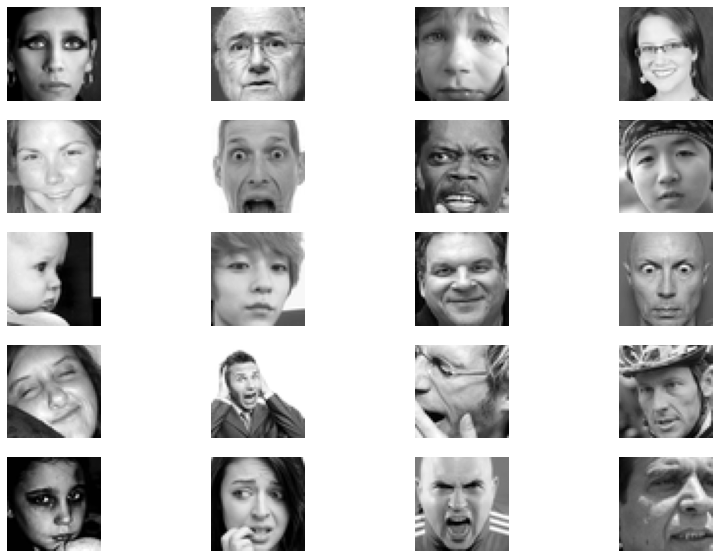

In [26]:
fig=plt.figure(figsize=(14, 10))
for i in range(20):
    fig.add_subplot(5,4,i+1) 
    plt.axis('off')
    plt.imshow(X_train[i+4].reshape(48,48),cmap='gray')
plt.show()

## CNN model

In [27]:
model = Sequential()

model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(48,48,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))         # filter size nd stride size
model.add(Dropout(0.25))

model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25)) 

model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25)) 

model.add(Flatten())         # reshape function which make ur 3d volume to linearly 

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5)) 

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(7,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 10, 64)       

In [28]:
model.compile(loss="categorical_crossentropy",optimizer='adam', metrics=['accuracy'])

In [29]:
checkpoint=ModelCheckpoint("best_model.h5", monitor='val_loss',save_best_only=True,  mode='min')
earlystop  = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5, verbose=1, restore_best_weights=True)

In [ ]:
hist = model.fit(X_train,y_train,validation_split=0.05,epochs=20,batch_size=256,callbacks=[checkpoint,earlystop])

Train on 27273 samples, validate on 1436 samples
Epoch 1/20
27273/27273 [==============================] - 184s 7ms/step - loss: 1.8254 - accuracy: 0.2456 - val_loss: 1.8059 - val_accuracy: 0.2319
Epoch 2/20
27273/27273 [==============================] - 190s 7ms/step - loss: 1.7391 - accuracy: 0.2882 - val_loss: 1.6421 - val_accuracy: 0.3308
Epoch 3/20
27273/27273 [==============================] - 191s 7ms/step - loss: 1.5553 - accuracy: 0.3894 - val_loss: 1.4370 - val_accuracy: 0.4499
Epoch 4/20
27273/27273 [==============================] - 182s 7ms/step - loss: 1.4096 - accuracy: 0.4562 - val_loss: 1.3024 - val_accuracy: 0.4993
Epoch 5/20
27273/27273 [==============================] - 182s 7ms/step - loss: 1.3173 - accuracy: 0.4945 - val_loss: 1.2276 - val_accuracy: 0.5306
Epoch 6/20
27273/27273 [==============================] - 195s 7ms/step - loss: 1.2588 - accuracy: 0.5225 - val_loss: 1.1954 - val_accuracy: 0.5550
Epoch 7/20
 2816/27273 [==>...........................] - ETA: 

In [45]:
model.evaluate(X_train,y_train)

28709/28709 [==============================] - 52s 2ms/step


[0.8330311710182006, 0.6975861191749573]

In [46]:
model.evaluate(X_test, y_test)

3589/3589 [==============================] - 6s 2ms/step


[1.0606920377694653, 0.5976595282554626]

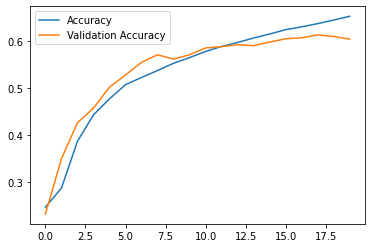

In [48]:
plt.plot(hist.history['accuracy'], label="Accuracy")
plt.plot(hist.history['val_accuracy'], label="Validation Accuracy")
plt.legend()

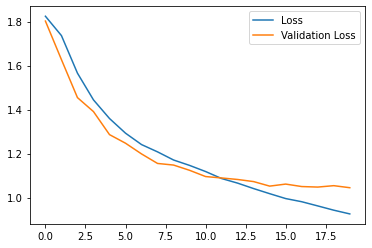

In [49]:
plt.plot(hist.history['loss'], label="Loss")
plt.plot(hist.history['val_loss'], label="Validation Loss")
plt.legend()

In [50]:
pred=model.predict_classes(X_test)

In [51]:
pred

array([0, 1, 0, ..., 6, 0, 6], dtype=int64)

Prediction=> Sad😢


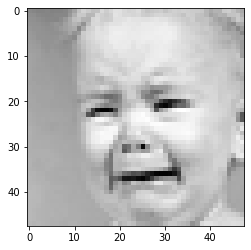

In [59]:
print("Prediction=>",(class_to_label[pred[171]]+class_to_emoji[str(pred[171])]))
plt.imshow(X_test[171].reshape(48,48),cmap='gray')
plt.show()

In [3]:
# load model
model = load_model("best_model.h5")

In [4]:
from PIL import Image, ImageFont, ImageDraw

## Use Webcam

In [7]:
cap=cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
while True:
    ret,frame=cap.read()
    if ret == False:
        continue
    gray_frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray_frame,1.3,5)
    
    for face in faces:
        x,y,w,h = face
        offset=10
        face_section = gray_frame[y-offset:y+h+offset,x-offset:x+w+offset]
        
        face_section = cv2.resize(face_section,(48,48))     
                
        pred = np.argmax(model.predict(face_section.reshape(1,48,48,1)))
        label = class_to_label[pred]
        cv2.putText(frame,label,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,255),2)
        
        fontpath = "./Symbola.ttf" 
        font = ImageFont.truetype(fontpath, 32)
        img_pil = Image.fromarray(frame)
        draw = ImageDraw.Draw(img_pil)
        draw.text((x,y-10),str(emoji.emojize(class_to_emoji[str(pred)])), font = font)
        img = np.array(img_pil)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
        
        cv2.imshow("Emotion", img)

    key_pressed=cv2.waitKey(1) & 0xFF

    if key_pressed == ord('q'):
        break

cap.release()  
cv2.destroyAllWindows()

In [2]:
from PIL import Image, ImageFont, ImageDraw
import numpy as np
import cv2
import emoji

# Open image with OpenCV
im_o = cv2.imread('elephant.jpg')

# Make into PIL Image
im_p = Image.fromarray(im_o)

# Get a drawing context
draw = ImageDraw.Draw(im_p)
font = ImageFont.truetype("arial-unicode-ms.ttf",32)
tick=str(emoji.emojize(':face_screaming_in_fear:'))
draw.text((40, 80),tick,(255,255,255),font=font)

# Convert back to OpenCV image and save
result_o = np.array(im_p)
cv2.imshow('result.jpg', result_o)

In [8]:
cap=cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
while True:
    ret,frame=cap.read()
    if ret == False:
        continue
    gray_frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray_frame,1.3,5)
    
    for face in faces:
        x,y,w,h = face
        offset=10
        face_section = gray_frame[y-offset:y+h+offset,x-offset:x+w+offset]
        
        face_section = cv2.resize(face_section,(48,48))     
                
        pred = np.argmax(model.predict(face_section.reshape(1,48,48,1)))
        label = class_to_label[pred]
        cv2.putText(frame,label,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,255),2)
        
        fontpath = "./arial-unicode-ms.ttf"
        font = ImageFont.truetype(fontpath, 32)
        img_pil = Image.fromarray(frame)
        draw = ImageDraw.Draw(img_pil)
        tick=str(emoji.emojize(class_to_emoji[str(pred)]))
        draw.text((x,y-10),tick, font = font)
        img = np.array(img_pil)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
        
        cv2.imshow("Emotion", img)

    key_pressed=cv2.waitKey(1) & 0xFF

    if key_pressed == ord('q'):
        break

cap.release()  
cv2.destroyAllWindows()